In [1]:
import pandas as pd

In [7]:
results_filepath = './alt-right_dislike_recommendation_0.csv'
channels_filepath = '../../communities/alt-right/ribeiro_alt-right.csv'

In [3]:
results_df = pd.read_csv(results_filepath)
results_df.head()

,video_id,channel_id,rank,component,bot_name,phase,phase_level,level,time,watch_video_id
0,1rlPdXPKNBc,UC7u9o8BHiJyH2_cef_nC7tQ,0,homepage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:41:51.630261,NaN
1,GyYJV1psDow,UClgRkhTL3_hImCAmdLfDE4g,1,homepage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:41:51.630273,NaN
2,7XthJZrzXgY,UCpB959t8iPrxQWj7G6n0ctQ,2,homepage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:41:51.630276,NaN
3,YS15RLUQ_FU,UCPDis9pjXuqyI7RYLJ-TTSA,3,homepage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:41:51.630278,NaN
4,z4NCh_Lq8hE,UCzXwjTI6c6mVn6oui_p6oiw,4,homepage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:41:51.630280,NaN


In [9]:
channels_df = pd.read_csv(channels_filepath, header=None)
channels_df.head()

,0
0,UCSTy-H5lSiCcozas32sfJlQ
1,UCmtALVZjXFzb4v3fIXDmDyw
2,UClMWnUHbxJKJLUgloN1mPUA
3,UC4f8Z2XefBDL421pnNEQH0Q
4,UCFc0stDRUkeBDc36qZeox1g


In [10]:
channels = set(channels_df[0])

In [11]:
# How many recommendations are from bad channels?
results_df['stain'] = results_df.apply(
    lambda row: row['channel_id'] in channels,
    axis=1
)
results_df.groupby(['stain'])['stain'].agg('count')

stain
False    1010
True      190
Name: stain, dtype: int64

In [13]:
from analysis import percentage_true

In [16]:
homepage_df = results_df[results_df['component']=='homepage']

In [24]:
stain_percents = homepage_df.groupby(['level'])['stain'].agg([percentage_true])
stain_percents

,percentage_true
level,
0,0.0
1,0.2
2,0.2
3,0.2
4,0.5
...,...
77,0.0
78,0.0
79,0.0


<AxesSubplot:xlabel='level'>

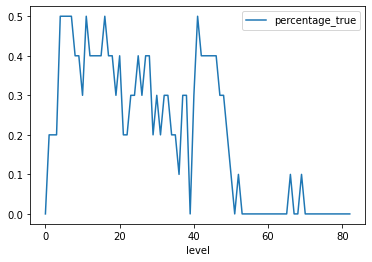

In [19]:
stain_percents.plot()

In [21]:
videopage_df = results_df[results_df['component']=='videopage']
videopage_df.head()

,video_id,channel_id,rank,component,bot_name,phase,phase_level,level,time,watch_video_id,stain
10,TcFt_khISRQ,UC4LyGVdDhiNUetMFSkw41wA,0,videopage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:42:10.081753,pKM-_x5vgNI,False
11,-rTT588cgtc,UCtyD5Kviv9fxHiyXPio-TOA,1,videopage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:42:10.081763,pKM-_x5vgNI,False
12,fsCMpMDj6kA,UCqMCUVhU7ESYppPAbzMKjWg,2,videopage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:42:10.081765,pKM-_x5vgNI,False
13,HtBevengm94,UCZtDKD0pFpPclXA7ZAti90w,3,videopage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:42:10.081766,pKM-_x5vgNI,True
14,XgFqguNaCIg,UCR3a64-Pbq4IaP4eAl8tpyA,4,videopage,alt-right_dislike_recommendation_0,stain,0,0,2022-05-12 22:42:10.081768,pKM-_x5vgNI,False


In [23]:
vp_stain_percents = videopage_df.groupby(['level'])['stain'].agg([percentage_true])
vp_stain_percents

,percentage_true
level,
0,0.2
3,0.0
4,0.1
5,0.2
6,0.4
7,0.1
8,0.0
9,0.1
10,0.0


<AxesSubplot:xlabel='level'>

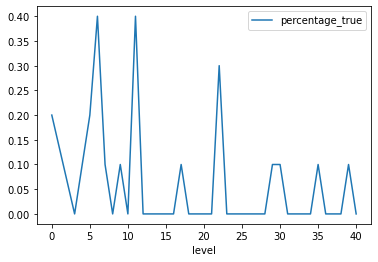

In [35]:
vp_stain_percents.loc[:40].plot()

In [38]:
s1 = vp_stain_percents.loc[0].values[0]
s2 = vp_stain_percents.loc[40].values[0]
s3 = vp_stain_percents.loc[82].values[0]
print('s1: {0}, \n'
      's2: {1}, \n'
      's3: {2}'.format(s1,s2,s3))

s1: 0.2, s2: 0.0, s3: 0.0


In [37]:
results_df.groupby(['phase'])['level'].agg('max')

phase
scrub       80
stain       40
teardown    82
Name: level, dtype: int64